In [15]:
import pandas as pd

In [16]:
df = pd.read_excel('Колезев.xlsx')

In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Выбираем только числовые столбцы для анализа
# numeric_cols = ['Новые комментарии', 'Поделились', 'Просмотры', 'Подписчики']
# correlation_matrix = df[numeric_cols].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Корреляционная матрица')
# plt.show()

In [18]:
pd.to_datetime(df['Время публикации видео'])

0     2023-09-03
1     2024-12-31
2     2023-06-02
3     2024-08-28
4     2023-07-17
         ...    
275   2023-09-09
276   2024-12-23
277   2024-04-10
278   2024-10-17
279   2024-02-02
Name: Время публикации видео, Length: 280, dtype: datetime64[ns]

In [19]:
df['Дата'] = pd.to_datetime(df['Время публикации видео'])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:


# Замена запятых на точки в числовых столбцах
df = df.apply(lambda x: x.str.replace(',', '.') if x.dtype == 'object' else x)

# Преобразование строковых значений в числовой формат
df = df.apply(pd.to_numeric, errors='ignore')



In [22]:
df['не_нрав_на_1000'] = (df['Отметки "Не нравится"'] / df['Просмотры']) * 1000
df['нрав_на_1000'] = (df['Отметки "Нравится"'] / df['Просмотры']) * 1000
df['нов_подпис_на_1000'] = (df['Новые подписчики'] / df['Просмотры']) * 1000
df['нов_отпис_на_1000'] = (df['Отказались от подписки'] / df['Просмотры']) * 1000
df['подпис_на_1000'] = (df['Подписчики'] / df['Просмотры']) * 1000
df['поделились_на_1000'] = (df['Поделились'] / df['Просмотры']) * 1000
df['коммент_на_1000'] = (df['Новые комментарии'] / df['Просмотры']) * 1000

In [23]:
print(df['CTR для значков видео (%)'].dtype)


float64


In [24]:
print(df.columns)

Index(['Контент', 'Название видео', 'Время публикации видео', 'Рубрика',
       'Срочность', 'Время', 'Продолжительность',
       'Средний процент просмотра (%)', 'Новые комментарии', 'Поделились',
       'Процент отметок "Нравится" (%)', 'Отметки "Не нравится"',
       'Отметки "Нравится"', 'Отказались от подписки', 'Новые подписчики',
       'Доход на тысячу просмотров (EUR)', 'Просмотры',
       'Время просмотра (часы)', 'Подписчики', 'Расчетный доход (EUR)',
       'Показы', 'CTR для значков видео (%)', 'Дата', 'не_нрав_на_1000',
       'нрав_на_1000', 'нов_подпис_на_1000', 'нов_отпис_на_1000',
       'подпис_на_1000', 'поделились_на_1000', 'коммент_на_1000'],
      dtype='object')


In [25]:
  category_column = 'Рубрика'  
# category_column = 'Срочность'  
# category_column = 'Время'  
  



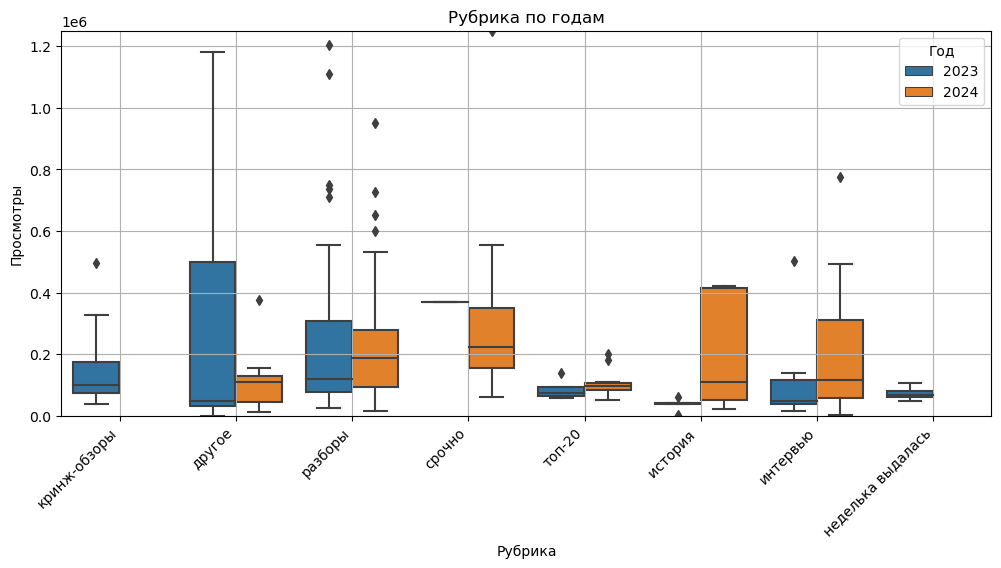

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year
    filtered_df = df[df['Год'].isin([2023, 2024])]

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='Просмотры', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('Просмотры')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    plt.ylim(0, 1250000)

    plt.show()
else:
    print("Нет данных для отображения.")


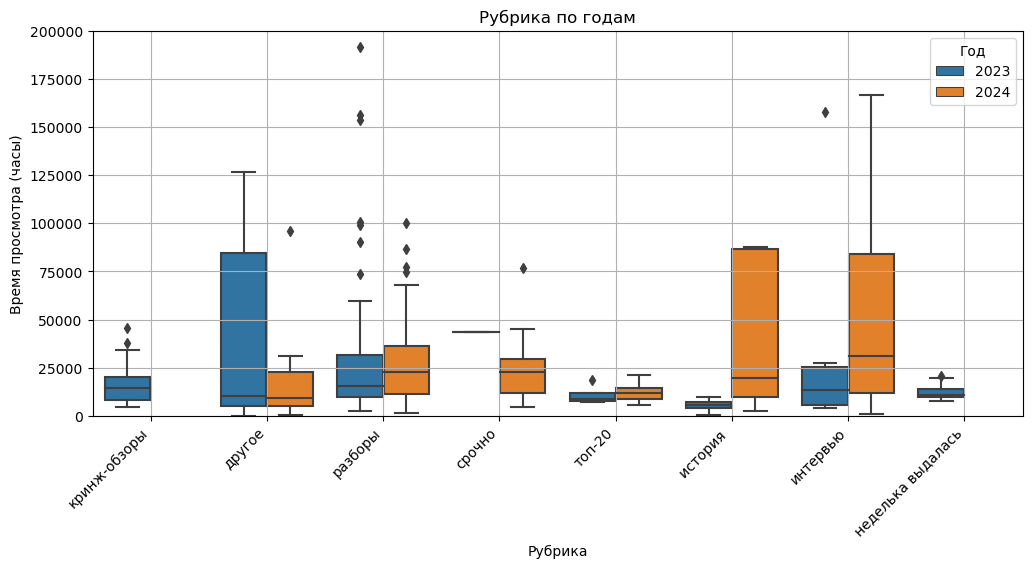

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='Время просмотра (часы)', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('Время просмотра (часы)')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов
    
    
    plt.ylim(0, 200000)

    plt.show()
else:
    print("Нет данных для отображения.")


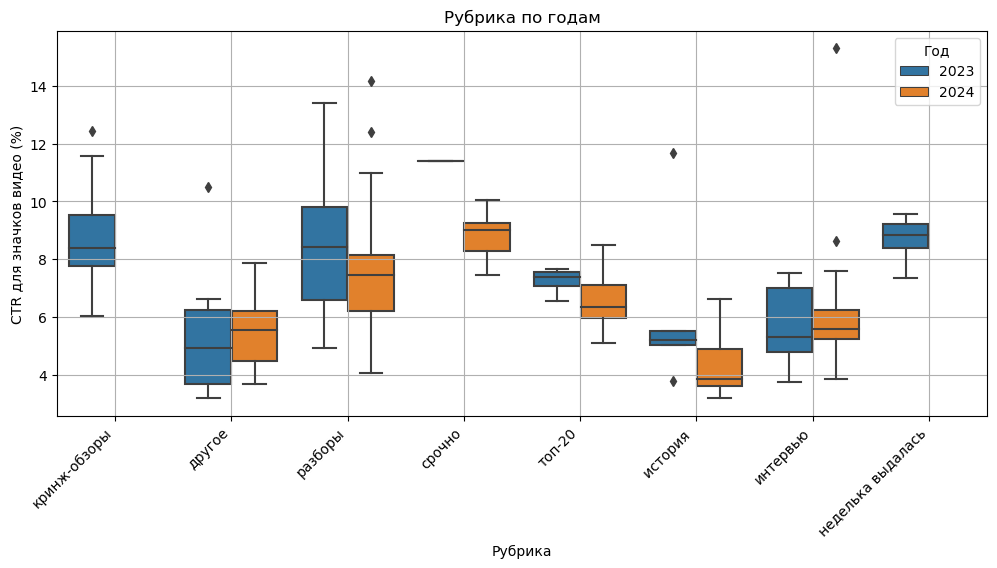

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='CTR для значков видео (%)', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('CTR для значков видео (%)')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    #plt.ylim(0, 500000)

    plt.show()
else:
    print("Нет данных для отображения.")


In [36]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from matplotlib.backends.backend_pdf import PdfPages


# df = pd.DataFrame(data)
# category_column = 'category_column'

# # Функция для первого графика
# def plot_graph1():
#     if not df.empty:
#         df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
#         df['Год'] = df['Дата'].dt.year
#         plt.figure(figsize=(12, 5))
#         sns.boxplot(x=category_column, y='Просмотры', hue='Год', data=df)
#         plt.title(f'{category_column} по годам: Просмотры')
#         plt.grid()
#         plt.xlabel(category_column)
#         plt.ylabel('Просмотры')
#         plt.xticks(rotation=45, ha='right')
#     else:
#         print("Нет данных для графика 1.")

# # Функция для второго графика
# def plot_graph2():
#     if not df.empty:
#         df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
#         df['Год'] = df['Дата'].dt.year
#         plt.figure(figsize=(12, 5))
#         sns.boxplot(x=category_column, y='CTR для значков видео (%)', hue='Год', data=df)
#         plt.title(f'{category_column} по годам: CTR для значков видео (%)')
#         plt.grid()
#         plt.xlabel(category_column)
#         plt.ylabel('CTR для значков видео (%)')
#         plt.xticks(rotation=45, ha='right')
#     else:
#         print("Нет данных для графика 2.")

# # Функция для третьего графика
# def plot_graph3():
#     if not df.empty:
#         df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
#         df['Год'] = df['Дата'].dt.year
#         plt.figure(figsize=(12, 5))
#         sns.boxplot(x=category_column, y='Постоянные зрители', hue='Год', data=df)
#         plt.title(f'{category_column} по годам: Постоянные зрители')
#         plt.grid()
#         plt.xlabel(category_column)
#         plt.ylabel('Постоянные зрители')
#         plt.xticks(rotation=45, ha='right')
#     else:
#         print("Нет данных для графика 3.")

# # Сохранение графиков в один PDF
# with PdfPages("all_graphs.pdf") as pdf:
#     for plot_function in [plot_graph1, plot_graph2, plot_graph3]:
#         plot_function()  # Вызываем функцию для построения графика
#         pdf.savefig()  # Сохраняем текущий график в PDF
#         plt.close()  # Закрываем текущий график

# print("Все графики сохранены в all_graphs.pdf")


In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Убедимся, что данные не пустые
# if not df.empty:
#     # Преобразуем столбец с датами в тип datetime, если это необходимо
#     df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

#     # Если преобразование прошло успешно, извлекаем год
#     df['Год'] = df['Дата'].dt.year

#     plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

#     # Строим boxplot, разделяя по рубрике и году
#     sns.boxplot(x=category_column, y='Постоянные зрители', hue='Год', data=filtered_df.reset_index())

#     plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
#     plt.grid()
#     plt.xlabel(category_column)
#     plt.ylabel('Постоянные зрители')

#     plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

#     #plt.ylim(0, 500000)

#     plt.show()
# else:
#     print("Нет данных для отображения.")


In [38]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Убедимся, что данные не пустые
# if not df.empty:
#     # Преобразуем столбец с датами в тип datetime, если это необходимо
#     df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

#     # Если преобразование прошло успешно, извлекаем год
#     df['Год'] = df['Дата'].dt.year

#     plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

#     # Строим boxplot, разделяя по рубрике и году
#     sns.boxplot(x=category_column, y='Новые зрители', hue='Год', data=df.reset_index())

#     plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
#     plt.grid()
#     plt.xlabel(category_column)
#     plt.ylabel('Новые зрители')

#     plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

#     #plt.ylim(0, 500000)

#     plt.show()
# else:
#     print("Нет данных для отображения.")


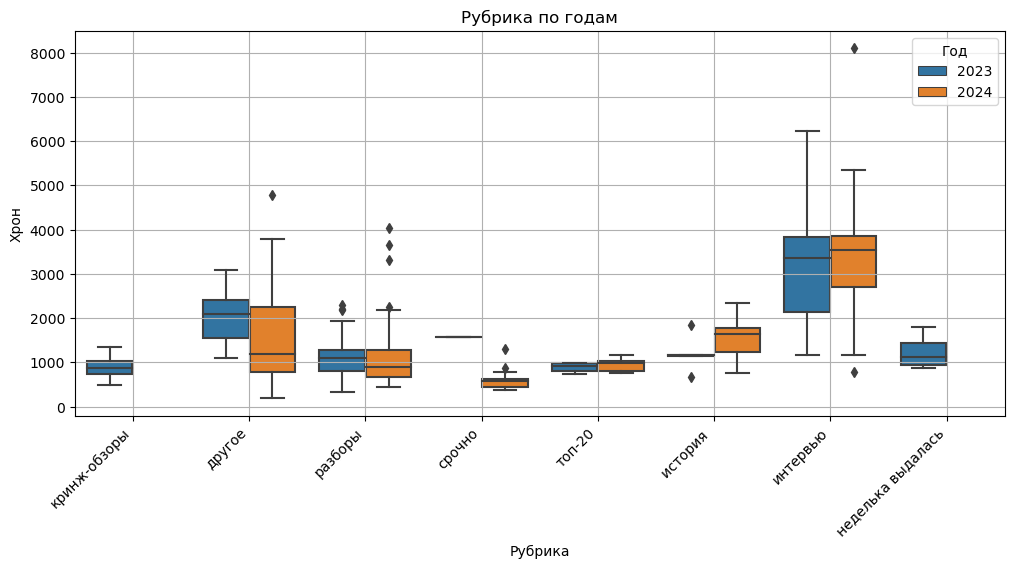

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='Продолжительность', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('Хрон')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    #plt.ylim(0, 500000)

    plt.show()
else:
    print("Нет данных для отображения.")


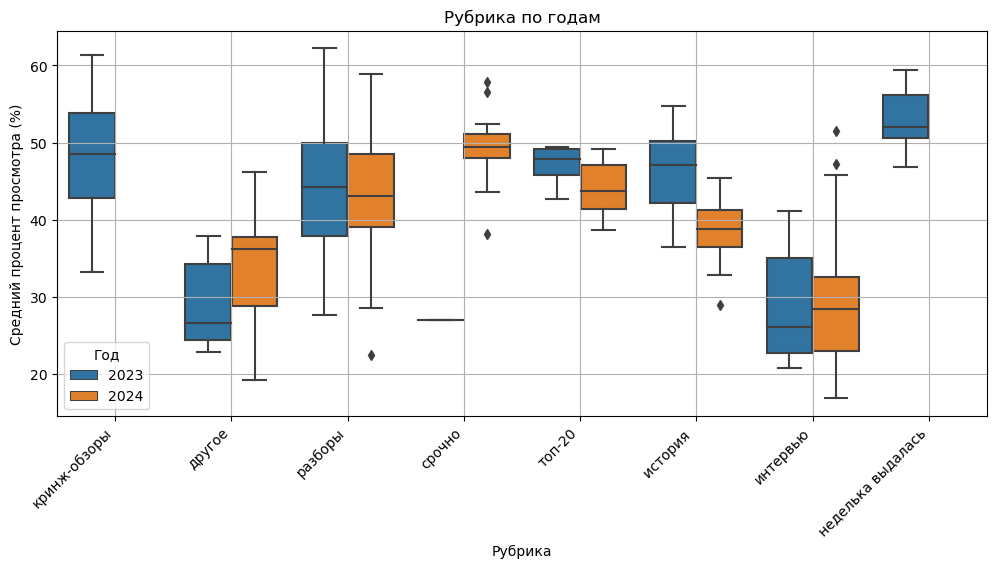

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='Средний процент просмотра (%)', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('Средний процент просмотра (%)')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    #plt.ylim(0, 500000)

    plt.show()
else:
    print("Нет данных для отображения.")


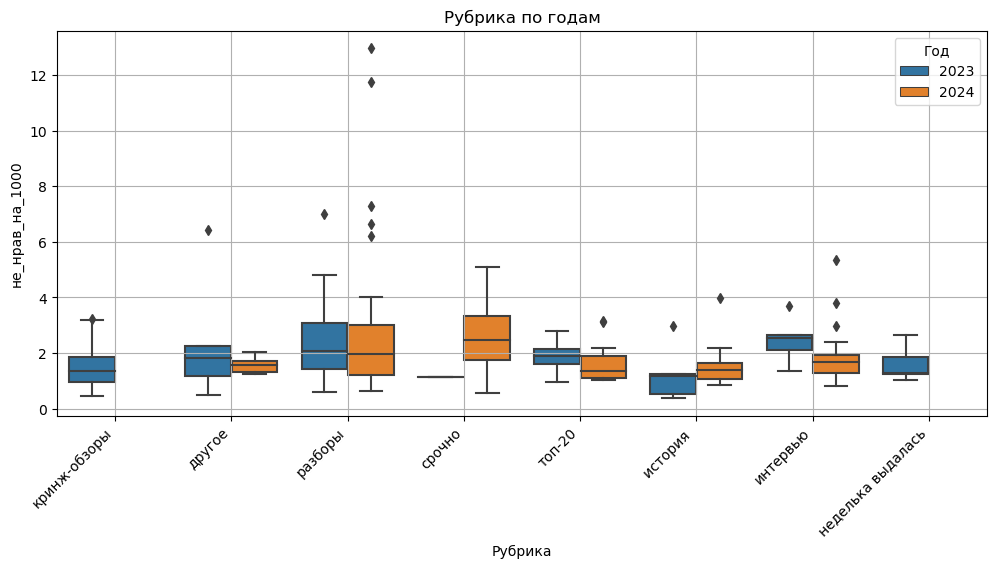

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='не_нрав_на_1000', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('не_нрав_на_1000')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

#     plt.ylim(0, 3)

    plt.show()
else:
    print("Нет данных для отображения.")


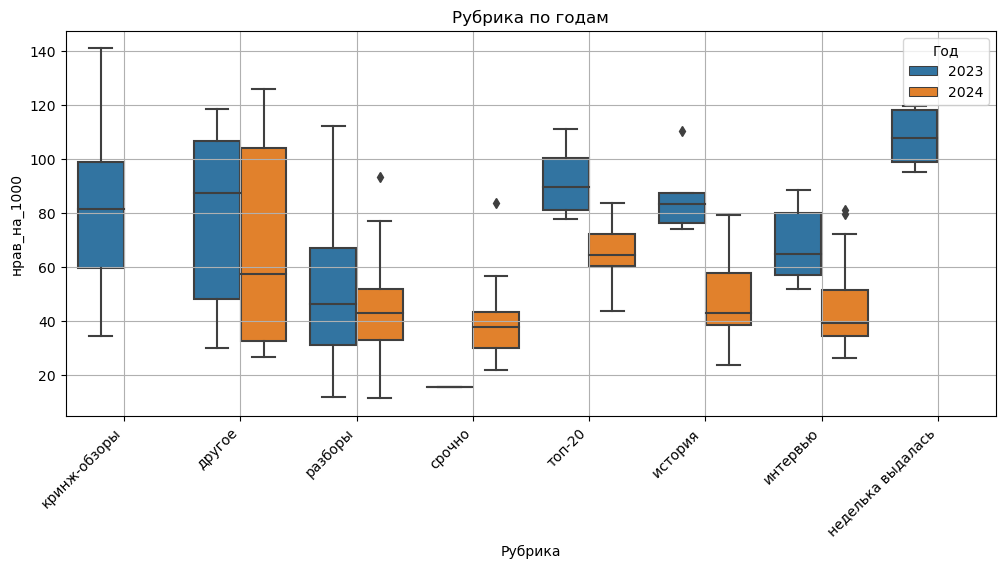

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='нрав_на_1000', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('нрав_на_1000')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    #plt.ylim(0, 500000)

    plt.show()
else:
    print("Нет данных для отображения.")


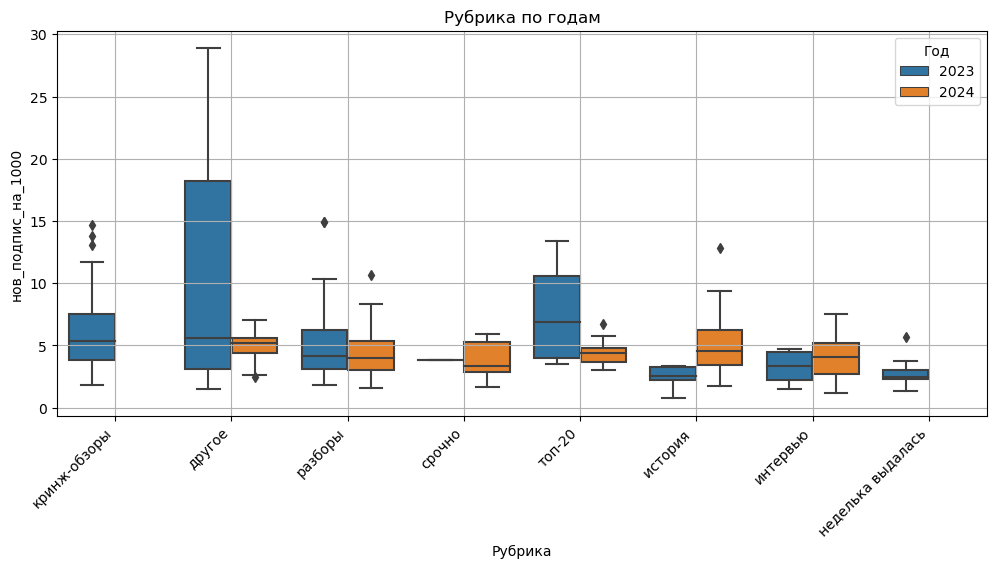

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='нов_подпис_на_1000', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('нов_подпис_на_1000')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

#     plt.ylim(0, 0)

    plt.show()
else:
    print("Нет данных для отображения.")


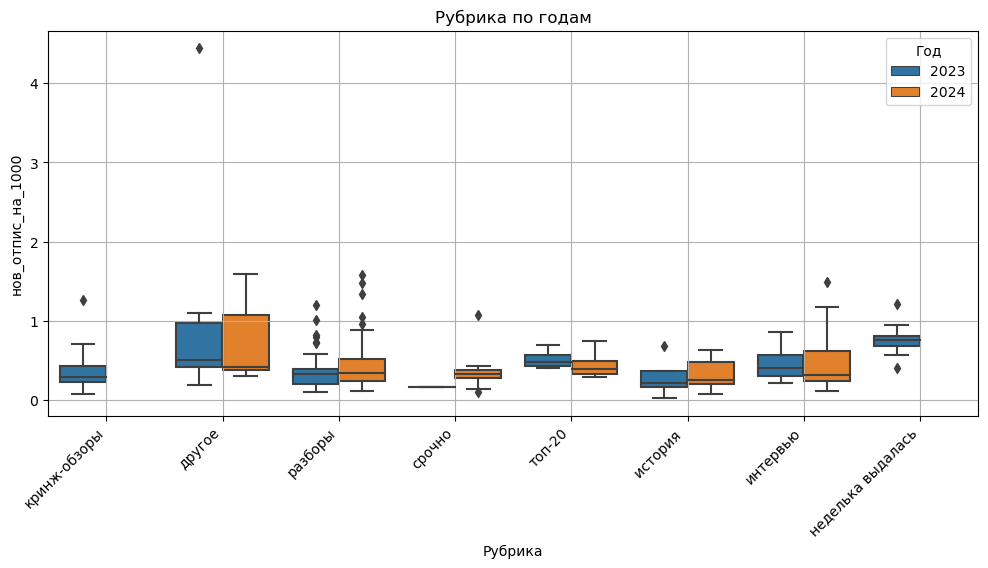

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='нов_отпис_на_1000', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('нов_отпис_на_1000')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    #plt.ylim(0, 500000)

    plt.show()
else:
    print("Нет данных для отображения.")


In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Убедимся, что данные не пустые
# if not df.empty:
#     # Преобразуем столбец с датами в тип datetime, если это необходимо
#     df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

#     # Если преобразование прошло успешно, извлекаем год
#     df['Год'] = df['Дата'].dt.year

#     plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

#     # Строим boxplot, разделяя по рубрике и году
#     sns.boxplot(x=category_column, y='подпис_на_1000', hue='Год', data=filtered_df.reset_index())

#     plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
#     plt.grid()
#     plt.xlabel(category_column)
#     plt.ylabel('подпис_на_1000')

#     plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

#     #plt.ylim(0, 500000)

#     plt.show()
# else:
#     print("Нет данных для отображения.")


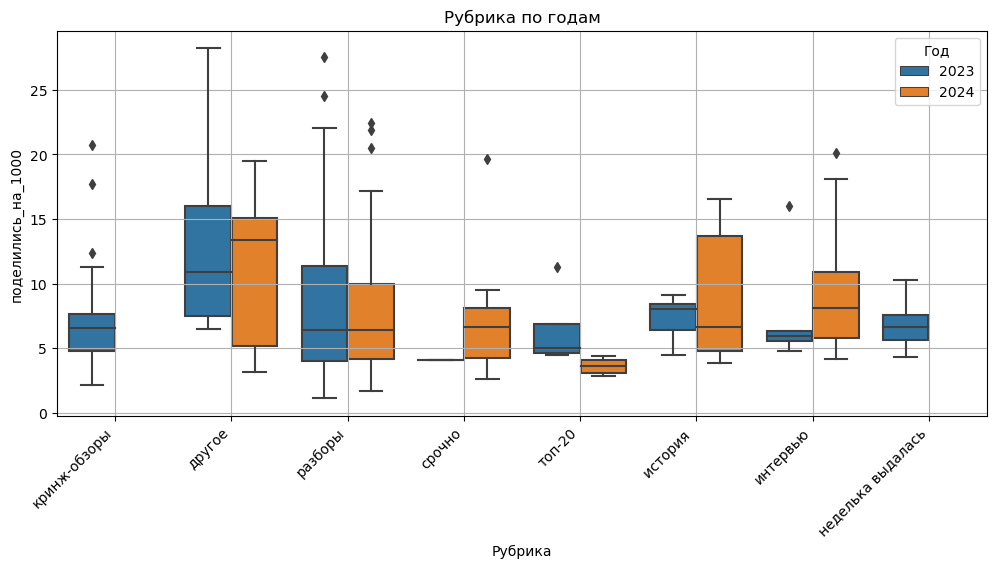

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='поделились_на_1000', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('поделились_на_1000')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    #plt.ylim(0, 500000)

    plt.show()
else:
    print("Нет данных для отображения.")


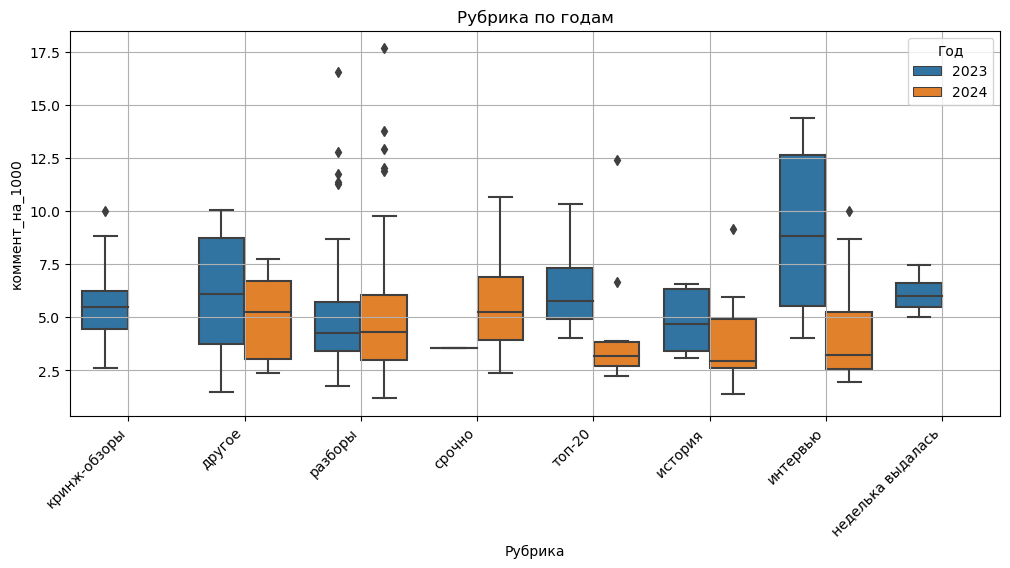

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убедимся, что данные не пустые
if not df.empty:
    # Преобразуем столбец с датами в тип datetime, если это необходимо
    df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')  # Преобразуем в datetime, строки будут заменены на NaT, если не удастся

    # Если преобразование прошло успешно, извлекаем год
    df['Год'] = df['Дата'].dt.year

    plt.figure(figsize=(12, 5))  # Увеличенный размер фигуры для лучшего отображения

    # Строим boxplot, разделяя по рубрике и году
    sns.boxplot(x=category_column, y='коммент_на_1000', hue='Год', data=filtered_df.reset_index())

    plt.title(f'{category_column} по годам')  # Заголовок с названием переменной
    plt.grid()
    plt.xlabel(category_column)
    plt.ylabel('коммент_на_1000')

    plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X на 45 градусов

    #plt.ylim(0, 500000)

    plt.show()
else:
    print("Нет данных для отображения.")


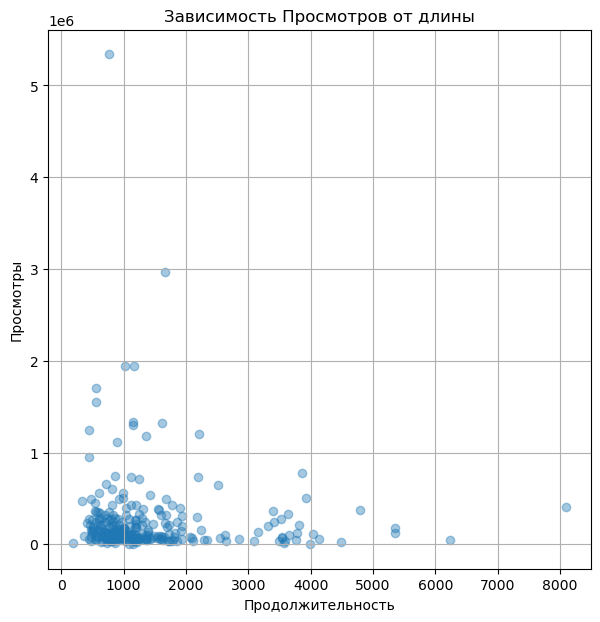

In [48]:
plt.figure(figsize=(7,7))
plt.title('Зависимость Просмотров от длины')
plt.xlabel('Продолжительность')
plt.ylabel('Просмотры')
plt.grid()
plt.scatter(
        df['Продолжительность'],
        df['Просмотры'],
        
        alpha = 0.4

)
# plt.ylim(0, 500000)
plt.show()

In [49]:
df['День_недели'] = df['Дата'].dt.strftime('%A')

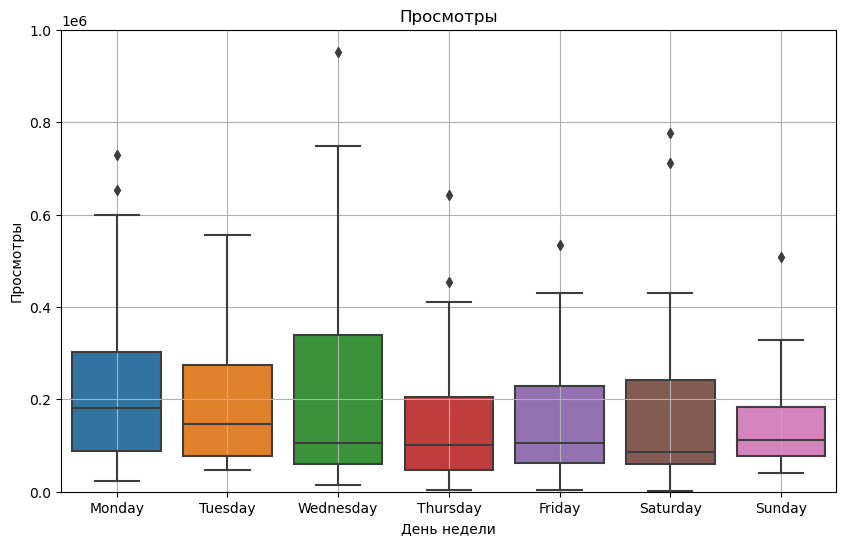

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из CSV-файла
# df = pd.read_csv('your_file.csv') # Предположим, что df уже загружен

# Преобразование даты и извлечение дня недели
df['Дата'] = pd.to_datetime(df['Дата'])  # Преобразование в формат datetime
df['День_недели'] = df['Дата'].dt.strftime('%A')

# Задание порядка дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['День_недели'] = pd.Categorical(df['День_недели'], categories=days_order, ordered=True)

# Создание графика
plt.figure(figsize=(10, 6))
sns.boxplot(x='День_недели', y='Просмотры', data=df)

plt.title('Просмотры')
plt.grid()
plt.xlabel('День недели')
plt.ylabel('Просмотры')
plt.ylim(0, 1000000)
plt.show()


/var/folders/24/5893984j4k18lvpdb33_dyvr0000gn/T/ipykernel_90771/1595908048.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_types))  # Выбираем карту цветов


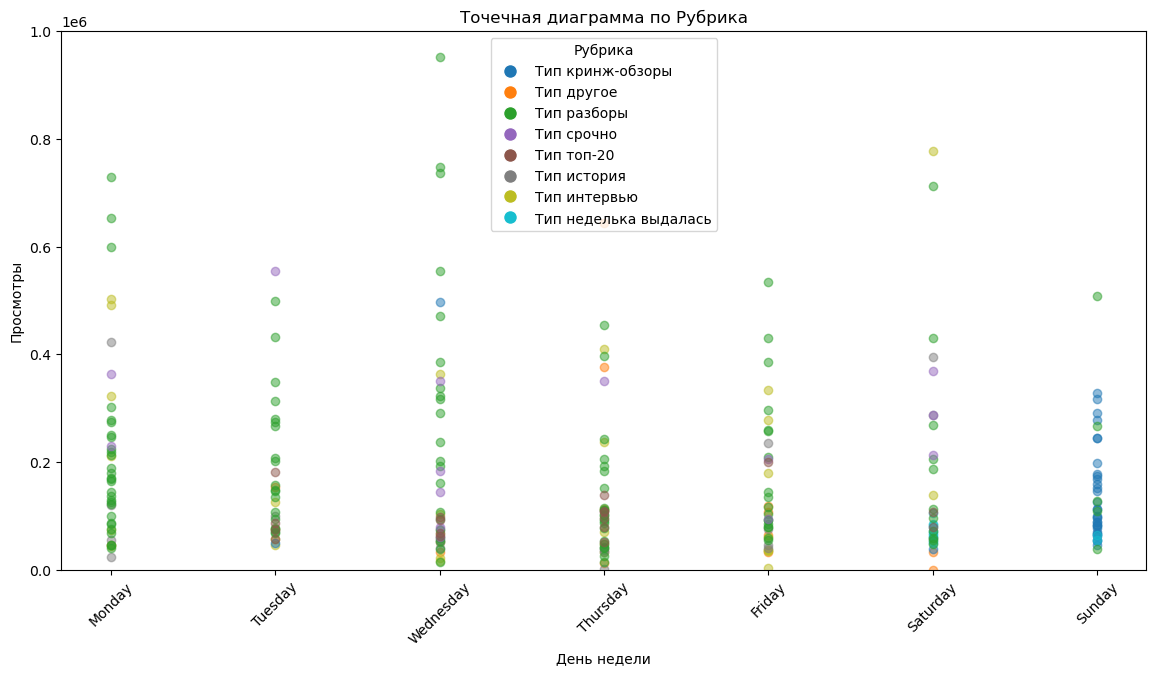

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
# category_column = 'Рубрика'  

# Проверьте наличие столбца 'Тип' и других необходимых столбцов в DataFrame
required_columns = [category_column, 'День_недели', 'Просмотры']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"DataFrame должен содержать столбцы: {required_columns}")

# Увеличение размера фигуры
plt.figure(figsize=(14, 7))

# Получение уникальных типов из DataFrame
unique_types = df[category_column].unique()

# Автоматическая генерация цветовой карты для каждого типа
colors = plt.cm.get_cmap('tab10', len(unique_types))  # Выбираем карту цветов
color_map = {type_: colors(i) for i, type_ in enumerate(unique_types)}

# Словарь для хранения меток легенды
legend_elements = []

# Определение порядка дней недели от понедельника до воскресенья
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Преобразование столбца 'День_недели' в категорию с заданным порядком
df['День_недели'] = pd.Categorical(df['День_недели'], categories=days_order, ordered=True)

# Преобразование 'День_недели' в числовые значения, чтобы использовать для оси X
df['День_недели_num'] = df['День_недели'].cat.codes

# Создание scatter plot для каждого типа
for type_, color in color_map.items():
    plt.scatter([], [], color=color, label=f'{category_column} {type_}', alpha=0.5)  # Пустой scatter для легенды
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Тип {type_}'))

# Отрисовка точек с прозрачностью для каждого типа
for type_, group in df.groupby(category_column):
    plt.scatter(group['День_недели_num'], group['Просмотры'], color=color_map[type_], alpha=0.5)

# Добавление легенды
plt.legend(handles=legend_elements, title=category_column)

# Добавление заголовка и подписей к осям
plt.title(f'Точечная диаграмма по {category_column}')
plt.xlabel('День недели')
plt.ylabel('Просмотры')
plt.ylim(0, 1000000)
# Поворот меток по оси X для улучшения читаемости
plt.xticks(ticks=range(len(days_order)), labels=days_order, rotation=45)

# Отображение диаграммы
plt.show()


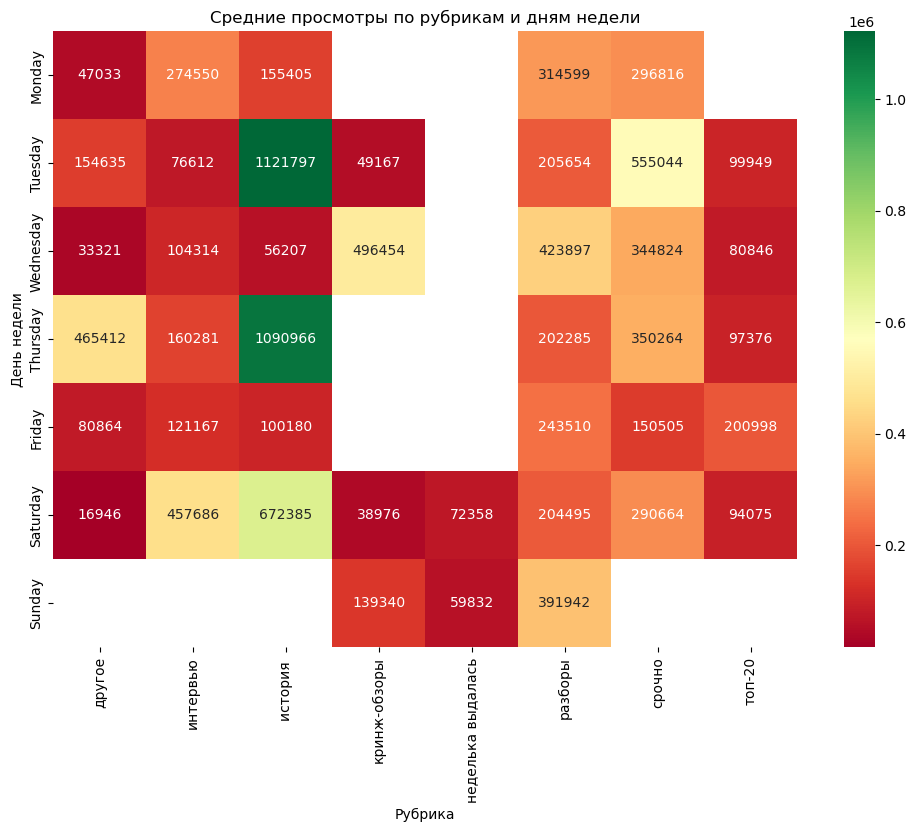

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Пример агрегирования данных: создаем сводную таблицу
pivot_table = df.pivot_table(
    index='День_недели',       # Дни недели на оси Y
    columns=category_column,    # Рубрики/категории на оси X
    values='Просмотры',        # Значения, которые нужно агрегировать
    aggfunc='mean'             # Функция агрегирования (среднее значение)
)

# Создание тепловой карты
plt.figure(figsize=(12, 8))  # Увеличиваем размер фигуры
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='RdYlGn')  # Градиент от красного к зеленому
plt.title('Средние просмотры по рубрикам и дням недели')
plt.xlabel('Рубрика')  # Добавляем подпись оси X
plt.ylabel('День недели')  # Добавляем подпись оси Y
plt.show()


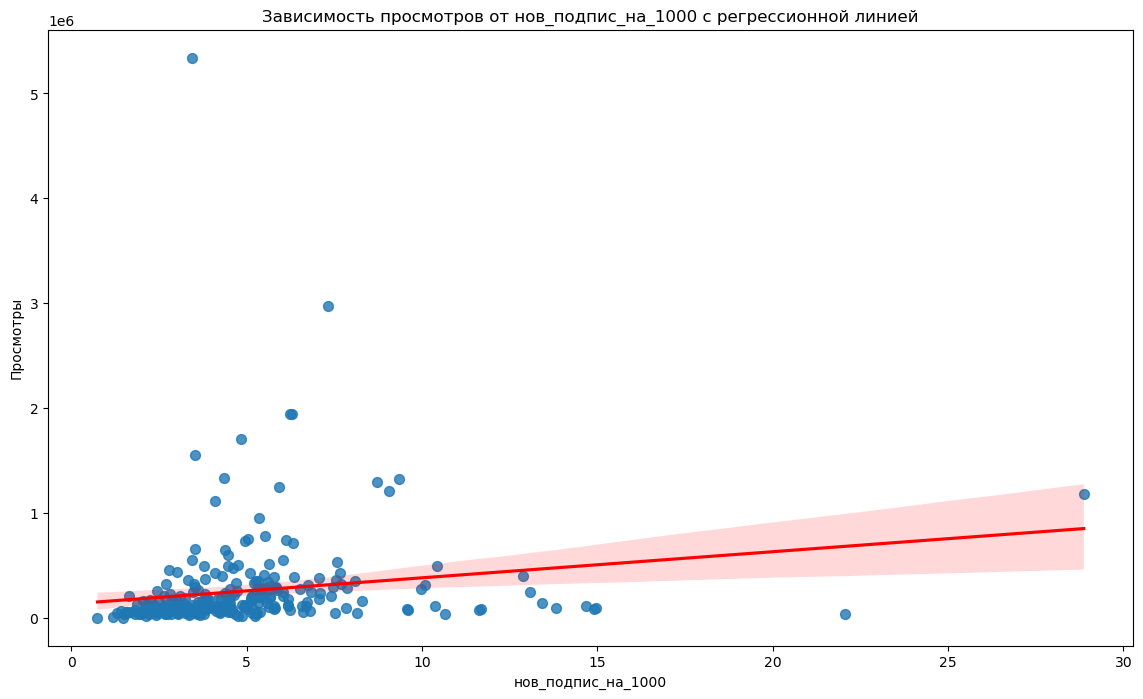

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(14, 8))

# Построение регрессионного графика на отфильтрованных данных
ax = sns.regplot(x='нов_подпис_на_1000', y='Просмотры', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})

# Установка пределов оси X
# ax.set_xlim(0, 3)

# Добавление заголовка и подписей к осям
plt.title('Зависимость просмотров от нов_подпис_на_1000 с регрессионной линией')
plt.xlabel('нов_подпис_на_1000')
plt.ylabel('Просмотры')

# Отображение графика
plt.show()


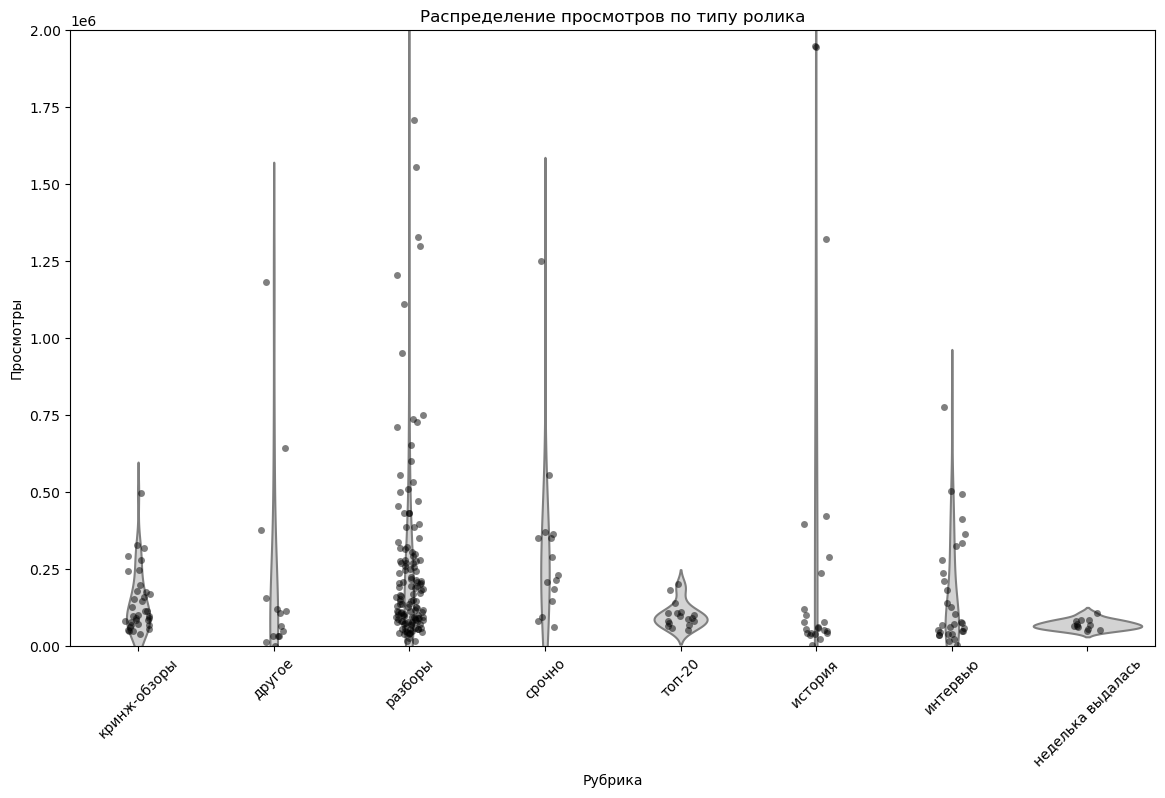

In [75]:
plt.figure(figsize=(14, 8))
sns.violinplot(x=category_column, y='Просмотры', data=df, inner=None, color='lightgray')
sns.stripplot(x=category_column, y='Просмотры', data=df, jitter=True, color='black', alpha=0.5)
plt.title('Распределение просмотров по типу ролика')
plt.xlabel(category_column)
plt.ylabel('Просмотры')
plt.xticks(rotation=45)
plt.ylim(0, 2000000)
plt.show()


In [60]:
# Соотношение новых подписчиков к просмотрам
df['Подписчики/Просмотры'] = df['Новые подписчики'] / df['Просмотры']

# Соотношение отметок "Нравится" к просмотрам
df['Нравится/Просмотры'] = df['Отметки "Нравится"'] / df['Просмотры']

# CTR к времени просмотра (часы)Ё
df['CTR/Время просмотра'] = df['CTR для значков видео (%)'] / df['Время просмотра (часы)']


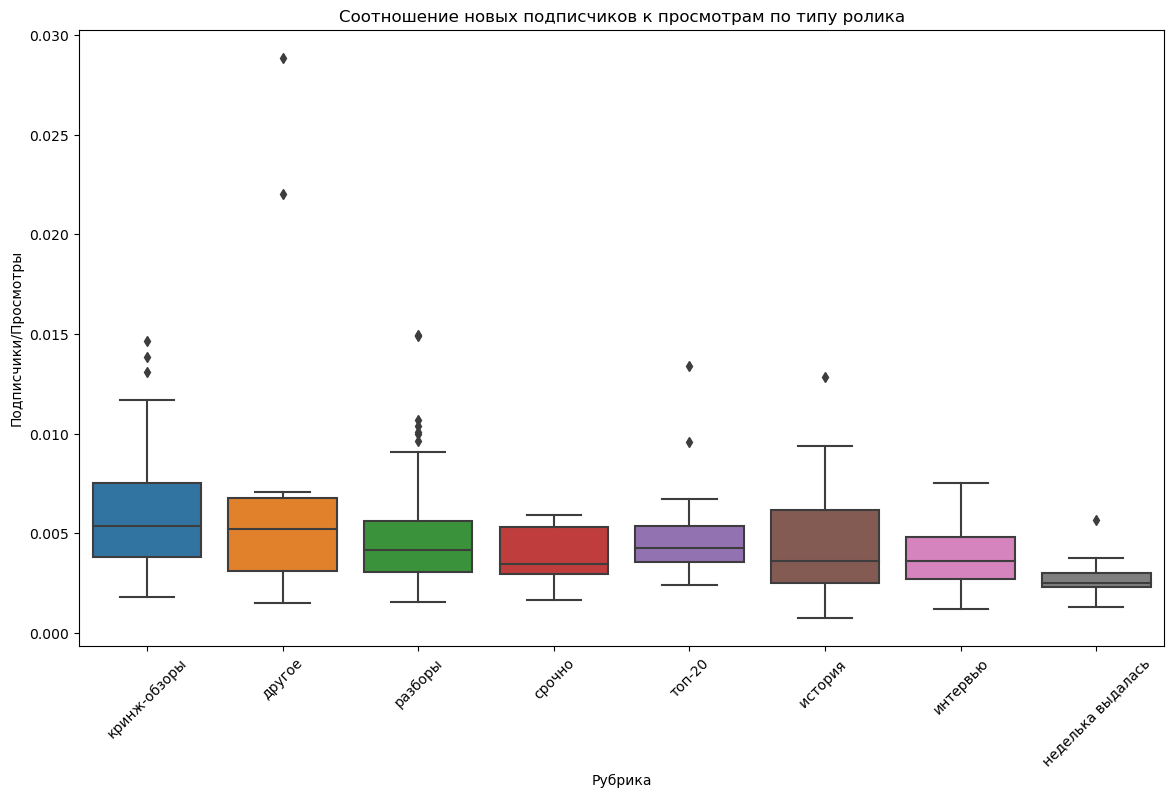

In [61]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=category_column, y='Подписчики/Просмотры', data=df)
plt.title('Соотношение новых подписчиков к просмотрам по типу ролика')
plt.xlabel(category_column)
plt.ylabel('Подписчики/Просмотры')
plt.xticks(rotation=45)
plt.show()


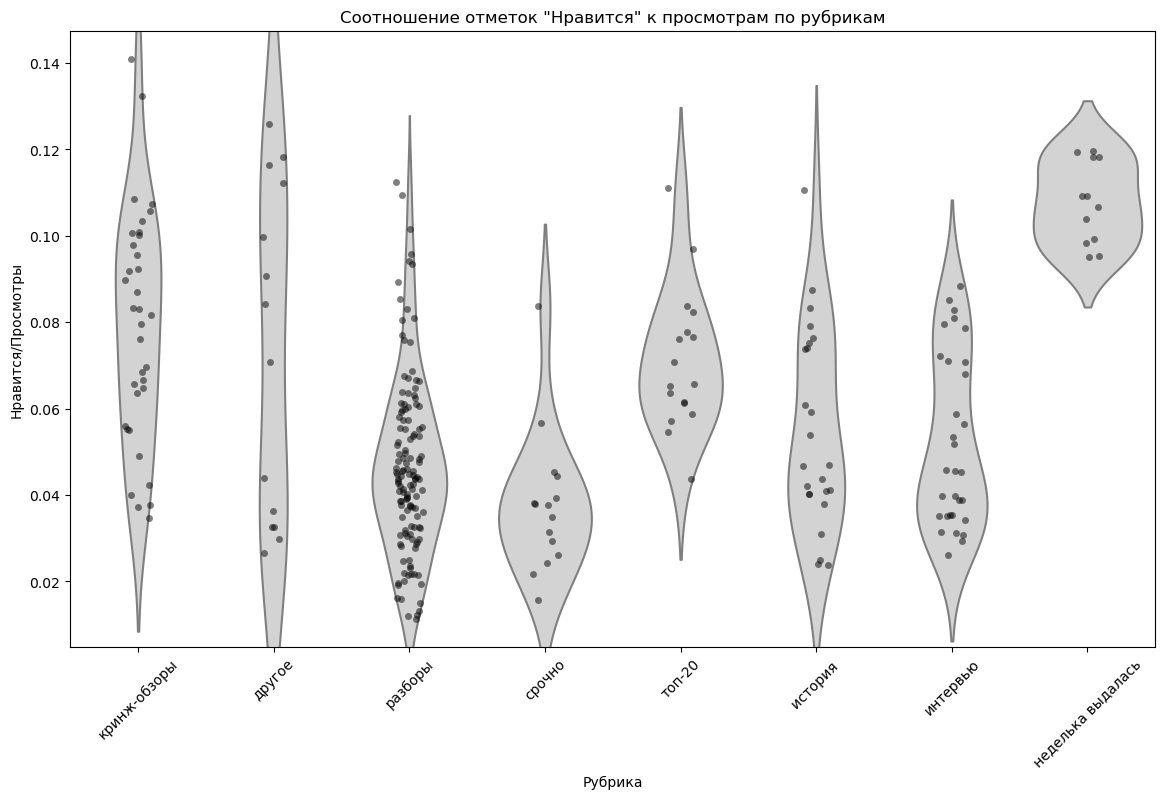

In [62]:
plt.figure(figsize=(14, 8))
sns.violinplot(x=category_column, y='Нравится/Просмотры', data=df, inner=None, color='lightgray')
sns.stripplot(x=category_column, y='Нравится/Просмотры', data=df, jitter=True, color='black', alpha=0.5)
plt.title('Соотношение отметок "Нравится" к просмотрам по рубрикам')
plt.xlabel(category_column)
plt.ylabel('Нравится/Просмотры')
plt.xticks(rotation=45)
plt.show()

In [40]:
# #  category_column = 'Про страну или город?'  
# # category_column = 'Материк'  
# # category_column = 'Бедные/богатые'  
# # category_column = 'Старый или новый ролик (с которого сделали адаптацию)'  
# # category_column = 'Кто диктор?'
# category_column = 'Время публикации видео.1'

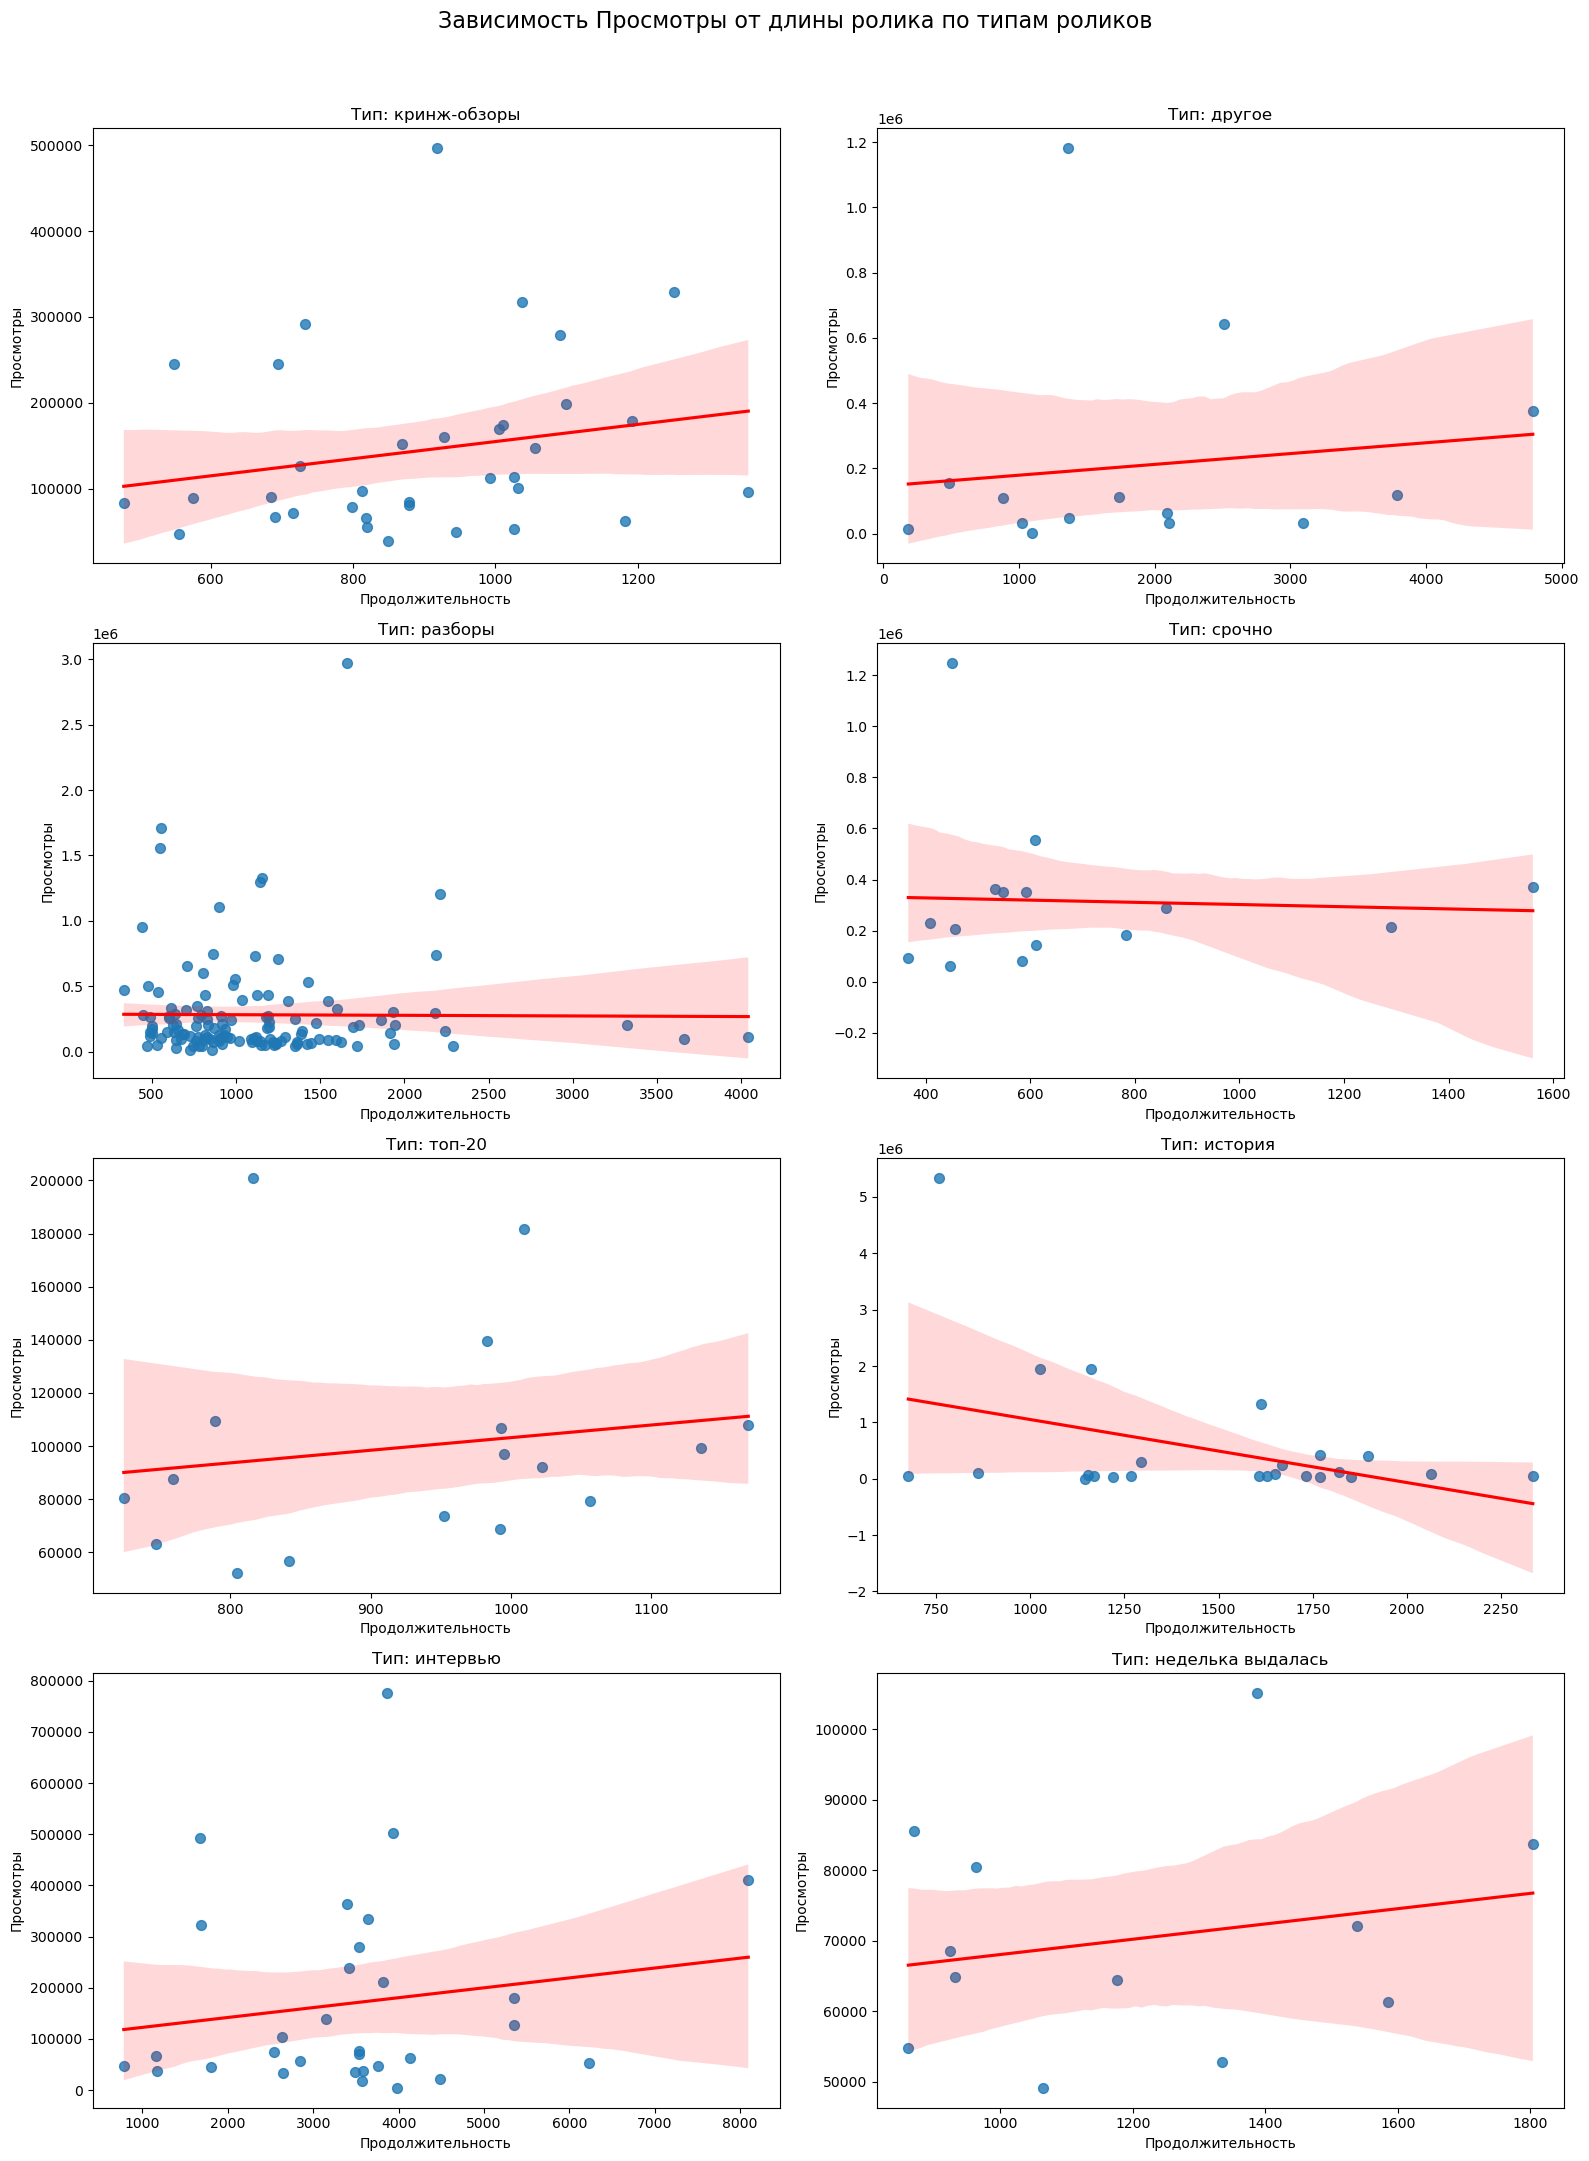

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем уникальные типы роликов
types = df['Рубрика'].unique()  # Замените 'Тип' на название вашего столбца

# Создание подграфиков
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 22))
axes = axes.flatten()  # Упрощаем доступ к осям

# Проходим по каждому типу и строим график
for i, t in enumerate(types):
    sns.regplot(x='Продолжительность', y='Просмотры', data=df[df['Рубрика'] == t], 
                ax=axes[i], scatter_kws={'s': 50}, line_kws={'color': 'red'})
    axes[i].set_title(f'Тип: {t}')  # Заголовок для каждого графика
    axes[i].set_xlabel('Продолжительность')
    axes[i].set_ylabel('Просмотры')

# Настройка общего заголовка
plt.suptitle('Зависимость Просмотры от длины ролика по типам роликов', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Убираем лишние отступы
plt.show()


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interactive, widgets

# Преобразуем дату в datetime и извлекаем год
df["Дата"] = pd.to_datetime(df["Дата"], errors="coerce")
df["Год"] = df["Дата"].dt.year

# Опции для фильтров
year_options = sorted(df["Год"].dropna().unique())  # Уникальные года
category_columns = ["Рубрика", "Срочность", "Время"]
metric_options = [
    "Просмотры", "Средний процент просмотра (%)", "Новые комментарии", "Поделились",
    'Процент отметок "Нравится" (%)', 'Отметки "Не нравится"', 'Отметки "Нравится"',
    "Отказались от подписки", "Новые подписчики", "Доход на тысячу просмотров (EUR)",
    "Время просмотра (часы)", "Подписчики", "Расчетный доход (EUR)", "Показы",
    'CTR для значков видео (%)', "не_нрав_на_1000", "нрав_на_1000", "нов_подпис_на_1000",
    "нов_отпис_на_1000", "подпис_на_1000", "поделились_на_1000", "коммент_на_1000"
]
chart_options = ["Boxplot", "Violinplot", "Stripplot", "Scatterplot"]

# Функция для построения графика
def plot_chart(selected_years, category_column, selected_metric, chart_type):
    # Фильтруем по выбранным годам
    filtered_df = df[df["Год"].isin(selected_years)]
    
    plt.figure(figsize=(12, 6))

    # Выбираем нужный график
    if chart_type == "Boxplot":
        sns.boxplot(x=category_column, y=selected_metric, hue="Год", data=filtered_df, palette="coolwarm")
    elif chart_type == "Violinplot":
        sns.violinplot(x=category_column, y=selected_metric, hue="Год", data=filtered_df, split=True, palette="coolwarm")
    elif chart_type == "Stripplot":
        sns.stripplot(x=category_column, y=selected_metric, hue="Год", data=filtered_df, dodge=True, palette="coolwarm", jitter=True)
    elif chart_type == "Scatterplot":
        sns.scatterplot(x=category_column, y=selected_metric, hue="Год", data=filtered_df, palette="coolwarm", alpha=0.7)

    # Настройки графика
    plt.title(f"{selected_metric} по {category_column} ({', '.join(map(str, selected_years))})")
    plt.xlabel(category_column)
    plt.ylabel(selected_metric)
    plt.xticks(rotation=45, ha="right")  # Угол поворота подписей
    plt.legend(title="Год")
    plt.grid()
    
    plt.show()

# Интерактивный виджет
interactive(plot_chart, 
            selected_years=widgets.SelectMultiple(options=year_options, value=[year_options[-1]], description="Годы"),
            category_column=widgets.Dropdown(options=category_columns, value="Рубрика", description="Группировка"),
            selected_metric=widgets.Dropdown(options=metric_options, value="Просмотры", description="Метрика"),
            chart_type=widgets.Dropdown(options=chart_options, value="Boxplot", description="Тип графика"))


interactive(children=(SelectMultiple(description='Годы', index=(2,), options=(2023, 2024, 2025), value=(2025,)…

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interactive, widgets

# Преобразуем дату в datetime и извлекаем год
df["Дата"] = pd.to_datetime(df["Дата"], errors="coerce")
df["Год"] = df["Дата"].dt.year

# Опции для фильтров
year_options = sorted(df["Год"].dropna().unique())  # Доступные года
category_columns = ["Рубрика", "Срочность", "Время"]
metric_options = [
    "Просмотры", "Средний процент просмотра (%)", "Новые комментарии", "Поделились",
    'Процент отметок "Нравится" (%)', 'Отметки "Не нравится"', 'Отметки "Нравится"',
    "Отказались от подписки", "Новые подписчики", "Доход на тысячу просмотров (EUR)",
    "Время просмотра (часы)", "Подписчики", "Расчетный доход (EUR)", "Показы",
    'CTR для значков видео (%)', "не_нрав_на_1000", "нрав_на_1000", "нов_подпис_на_1000",
    "нов_отпис_на_1000", "подпис_на_1000", "поделились_на_1000", "коммент_на_1000"
]

# Функция для построения графика
def plot_chart(selected_years, x_metric, y_metric):
    # Фильтруем данные по выбранным годам
    filtered_df = df[df["Год"].isin(selected_years)]
    
    plt.figure(figsize=(12, 6))

    # Построение регрессионного графика
    ax = sns.regplot(x=x_metric, y=y_metric, data=filtered_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

    # Формируем строку с выбранными годами
    years_str = ", ".join(map(str, selected_years))
    
    # Заголовок и подписи
    plt.title(f'Зависимость {y_metric} от {x_metric} ({years_str})')
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    
    plt.grid()
    plt.show()

# Интерактивный виджет
interactive_plot = interactive(
    plot_chart,
    selected_years=widgets.SelectMultiple(options=year_options, value=[year_options[-1]], description="Годы"),
    x_metric=widgets.Dropdown(options=metric_options, value="нов_подпис_на_1000", description="X-метрика"),
    y_metric=widgets.Dropdown(options=metric_options, value="Просмотры", description="Y-метрика")
)

interactive_plot


interactive(children=(SelectMultiple(description='Годы', index=(2,), options=(2023, 2024, 2025), value=(2025,)…